# B_b_1 : Obtenir les données - Historique demande d'électricité HQ

## Source : Historique de la demande d’électricité au Québec

Hydro-Québec

https://www.hydroquebec.com/documents-donnees/donnees-ouvertes/historique-demande-electricite-quebec/

Site consulté le : 2023-11-12

### Description

Ensemble de données historiques d’Hydro Québec sur la demande d’électricité au Québec en mégawatts. Les données sont disponibles à l’heure et cumulées annuellement. Elles montrent les variations du besoin d’électricité en fonction de l’heure de la journée.

### Fichiers ou services disponibles

Historique de la demande d’électricité au Québec (2022) [XLSX 196 Ko](https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/xlsx/historique-demande/2022-demande-electricite-quebec.xlsx)  
Historique de la demande d’électricité au Québec (2021) [XLSX 195 Ko](https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/xlsx/historique-demande/2021-demande-electricite-quebec.xlsx)  
Historique de la demande d’électricité au Québec (2020) [XLSX 196 Ko](https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/xlsx/historique-demande/2020-demande-electricite-quebec.xlsx)  
Historique de la demande d’électricité au Québec (2019) [XLSX 197 Ko](https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/xlsx/historique-demande/2019-demande-electricite-quebec.xlsx)  

### Information utile pour interpréter les données
Les données ouvertes dans cet ensemble sont calculées en temps réel par le Centre de conduite du réseau d’Hydro‑Québec. Elles sont offertes à titre informatif et ne peuvent être utilisées comme données officielles.

Les données officielles (transmises à la Régie de l’énergie du Québec) sont disponibles dans l’Historique des données de production et de consommation d’électricité au Québec.

La demande d’électricité pour une heure correspond à la demande totale moyenne pendant cette heure.

## Données
**date** : date et heure de la prise de mesure.  
**demande (MW) (numérique)** : demande totale moyenne d’électricité en mégawatts (MW).


## Imports des librairies 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from datetime import timedelta
from references.settings import colors_pal

plt.style.use("fivethirtyeight")

In [2]:
import black
import jupyter_black

jupyter_black.load(
    lab=True,
    line_length=55,
    target_version=black.TargetVersion.PY311,
)

# Pendant la rédaction, utiliser :  %load_ext jupyter_black

## Import d'un jeu de données (1 an)

Lecture d'un premier fichier Excel pour tester le fonctionnement et ajustement des types et noms de colonnes.

In [3]:
data_path = "../data/raw/hq"
file = "2019-demande-electricite-quebec.xlsx"

df = (
    pd.read_excel(os.path.join(data_path, file))
    .rename(columns={"Moyenne (MW)": "MW"})
    .set_index("Date")
)

print("Format du dataframe : ", df.shape)
pd.concat([df.head(5), df.tail(5)])

Format du dataframe :  (8760, 1)


,MW
Date,
2019-01-01 01:00:00,23762.55
2019-01-01 02:00:00,23830.23
2019-01-01 03:00:00,23608.07
2019-01-01 04:00:00,23562.48
2019-01-01 05:00:00,23546.16
2019-12-31 20:00:00,25399.77
2019-12-31 21:00:00,24869.12
2019-12-31 22:00:00,24241.29
2019-12-31 23:00:00,23423.71


In [4]:
df.describe()

,MW
count,8715.000000
mean,21505.408318
std,5451.697279
min,13318.280000
25%,17357.345000
50%,19578.210000
75%,25779.795000
max,37865.760000


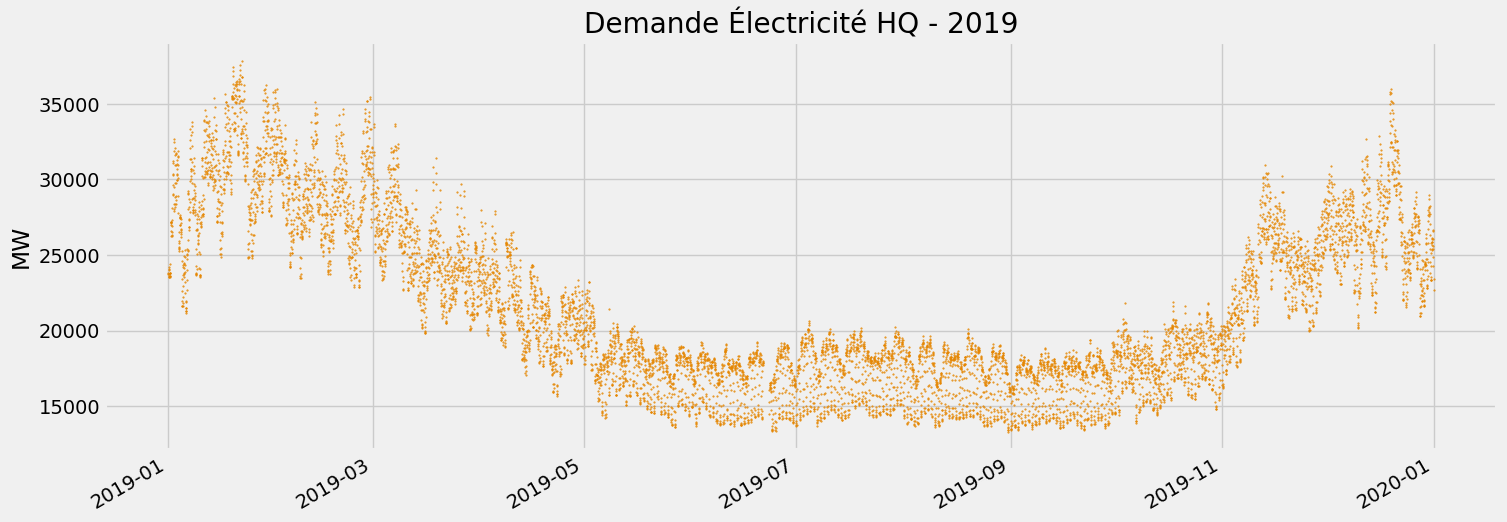

In [5]:
annee = df.index[0].year

df.plot(
    style=".",
    ms=1.0,
    color=colors_pal[6],
    figsize=(16, 6),
    title=f"Demande Électricité HQ - {annee}",
    xlabel="",
    ylabel="MW",
    legend=False,
)
plt.show()

## Trouver tous les fichiers dans le dossier de données historiques HQ

Dans le but de pouvoir réutiliser dans le futur lorsque nous ajouterons des années, nous voulons automatiser la concaténation de tous les fichiers Excel dans le dossier.

In [6]:
sorted(os.listdir(data_path))

['.DS_Store',
 '2019-demande-electricite-quebec.xlsx',
 '2020-demande-electricite-quebec.xlsx',
 '2021-demande-electricite-quebec.xlsx',
 '2022-demande-electricite-quebec.xlsx']

In [7]:
dfs = list()

files = sorted(
    [
        f
        for f in os.listdir(data_path)
        if f.endswith(".xlsx")
    ]
)

for file in files:
    df = (
        pd.read_excel(os.path.join(data_path, file))
        .rename(columns={"Moyenne (MW)": "MW"})
        .set_index("Date")
    )

    dfs.append(df)

    print(
        f"Format du dataframe de {df.index[0].year}: {df.shape}\n"
    )

    # Visualisation head tail
    print(pd.concat([df.head(5), df.tail(5)]))

    print("#" * 38, "\n")

Format du dataframe de 2019: (8760, 1)

                           MW
Date                         
2019-01-01 01:00:00  23762.55
2019-01-01 02:00:00  23830.23
2019-01-01 03:00:00  23608.07
2019-01-01 04:00:00  23562.48
2019-01-01 05:00:00  23546.16
2019-12-31 20:00:00  25399.77
2019-12-31 21:00:00  24869.12
2019-12-31 22:00:00  24241.29
2019-12-31 23:00:00  23423.71
2020-01-01 00:00:00  22687.53
###################################### 

Format du dataframe de 2020: (8784, 1)

                           MW
Date                         
2020-01-01 01:00:00  22461.08
2020-01-01 02:00:00  22356.54
2020-01-01 03:00:00  22261.61
2020-01-01 04:00:00  22214.34
2020-01-01 05:00:00  22331.18
2020-12-31 20:00:00  26278.77
2020-12-31 21:00:00  25669.79
2020-12-31 22:00:00  25257.69
2020-12-31 23:00:00  24627.64
2021-01-01 00:00:00  24109.25
###################################### 

Format du dataframe de 2021: (8760, 1)

                           MW
Date                         
2021-01-01 01:00:0

## Visualisation combinée des données

In [8]:
def creation_grap_hist_HQ_import(dfs, **kwargs):
    """
    Création de graphiques montrant la variation de la demande par année
    """
    # Nous voulons 2 colonnes par nb_rangees
    nb_rangees = math.ceil(len(dfs) / 2)

    fig, axs = plt.subplots(
        ncols=2, nrows=nb_rangees, figsize=(16, 8)
    )

    index_dfs = 0

    for row in range(nb_rangees):
        for col in range(2):
            axs[row, col].plot(
                dfs[index_dfs],
                color=colors_pal[
                    index_dfs % len(colors_pal)
                ],
                linewidth=0.5,
                linestyle="-",
                alpha=0.75,
            )
            axs[row, col].set_title(
                f"Demande Électricité HQ - {dfs[index_dfs].index[0].year}",
                fontsize=14,
            )
            axs[row, col].set_xlabel("")
            axs[row, col].set_ylabel("MW", fontsize=14)
            index_dfs += 1

    fig.suptitle(
        "Demande en électricité au Québec - Importation des fichiers",
        fontsize=24,
    )

    # Si nous voulons sauver le graph

    if file_to_save := kwargs.get(
        "file_to_save", False
    ):
        print(
            f"Sauvegardons le fichier : {file_to_save}"
        )
        plt.savefig(fname=file_to_save, dpi=300)

    else:
        plt.show()

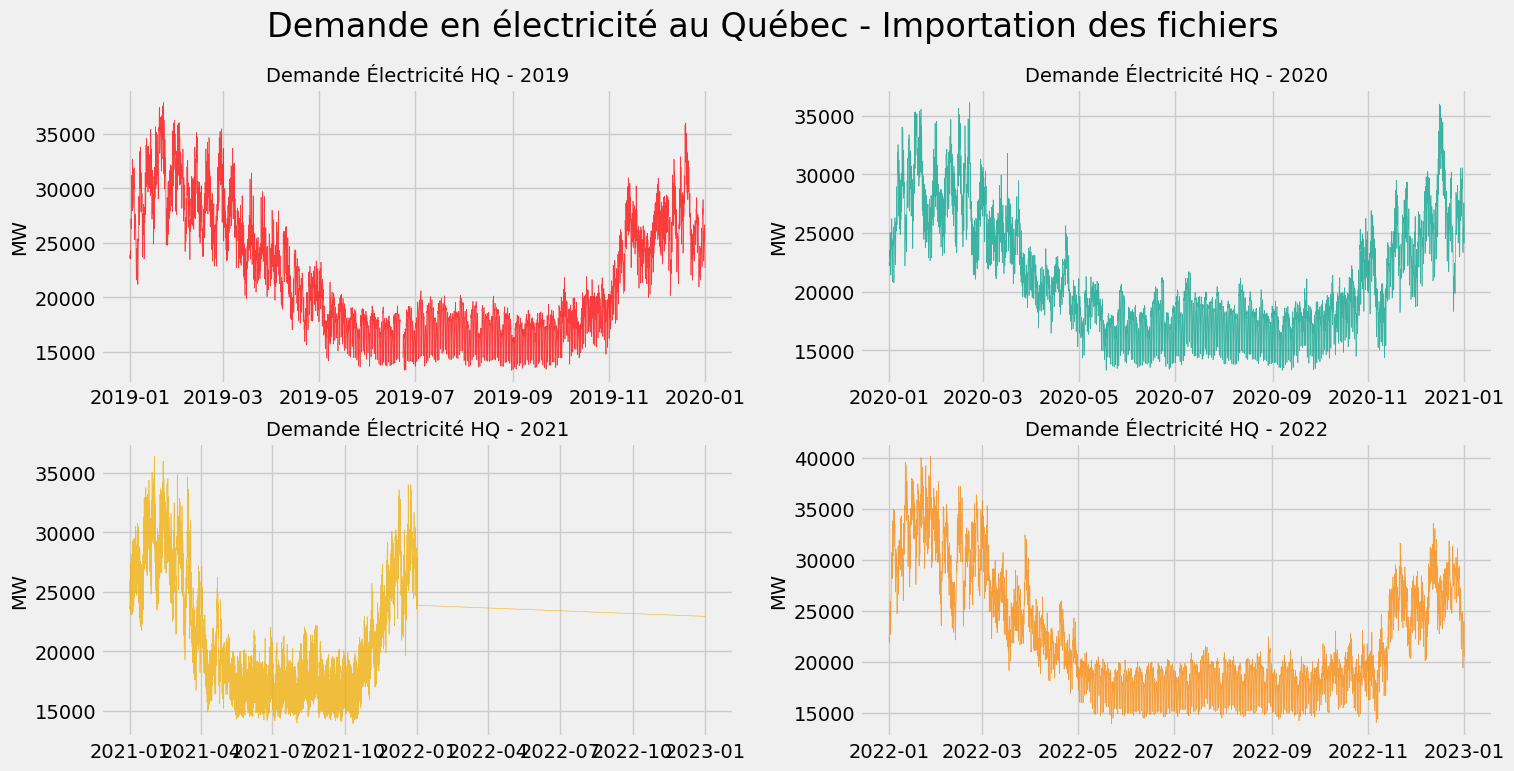

In [9]:
creation_grap_hist_HQ_import(dfs)

Nous pouvons bien voir qu'il y a un problème avec l'année 2021.  La dernière valeur a été mise au 1ᵉʳ janvier 2023 au lieu du 1ᵉʳ janvier 2022.

In [10]:
dfs[2].tail()

,MW
Date,
2021-12-31 20:00:00,26204.84
2021-12-31 21:00:00,25274.75
2021-12-31 22:00:00,24696.57
2021-12-31 23:00:00,23875.72
2023-01-01 00:00:00,22945.84


## Nettoyage des données *raw*

Comme principe de base, nous ne voulons pas toucher à nos données de base. Si on doit télécharger à nouveau les données, l'erreur réapparaîtra.

Créons donc une façon de vérifier l'erreur et la corriger.

Nous vérifions s'il y a plus de 2 heures entre deux rangées. (Il est possible d'avoir exactement 2 h lors des changements d'heure !)

In [11]:
def correction_donnes_hist_HQ_import(dfs):
    """
    Vérification et corrections des données importées :
    - Vérification s'il n'y a pas plus d'heure entre les
      données dans la colonne Date
    """
    index_dfs = 0

    for df in dfs:
        for i in range(df.shape[0] - 1):
            v = (
                df.index[i + 1] - df.index[i]
            ) > timedelta(
                hours=2
            )  # on ne veut pas inclure les changements d'heures
            # où delta = 2
            if v:
                print("Problème : ")
                print(
                    df.index[i],
                    df.index[i + 1],
                    sep="\n",
                )
                print("#" * 20)

                # Correction : on ajoute 1h au temps précédent
                as_list = df.index.tolist()
                as_list[i + 1] = df.index[
                    i
                ] + timedelta(hours=1)
                df.index = as_list

                print("Après Correction : ")
                print(
                    df.index[i],
                    df.index[i + 1],
                    sep="\n",
                )
                print("#" * 20)

                dfs[index_dfs] = df.copy()

        index_dfs += 1

In [12]:
correction_donnes_hist_HQ_import(dfs)

Problème : 
2021-12-31 23:00:00
2023-01-01 00:00:00
####################
Après Correction : 
2021-12-31 23:00:00
2022-01-01 00:00:00
####################


Après cette correction, nous pouvons refaire le graphique qui devrait être continu. 

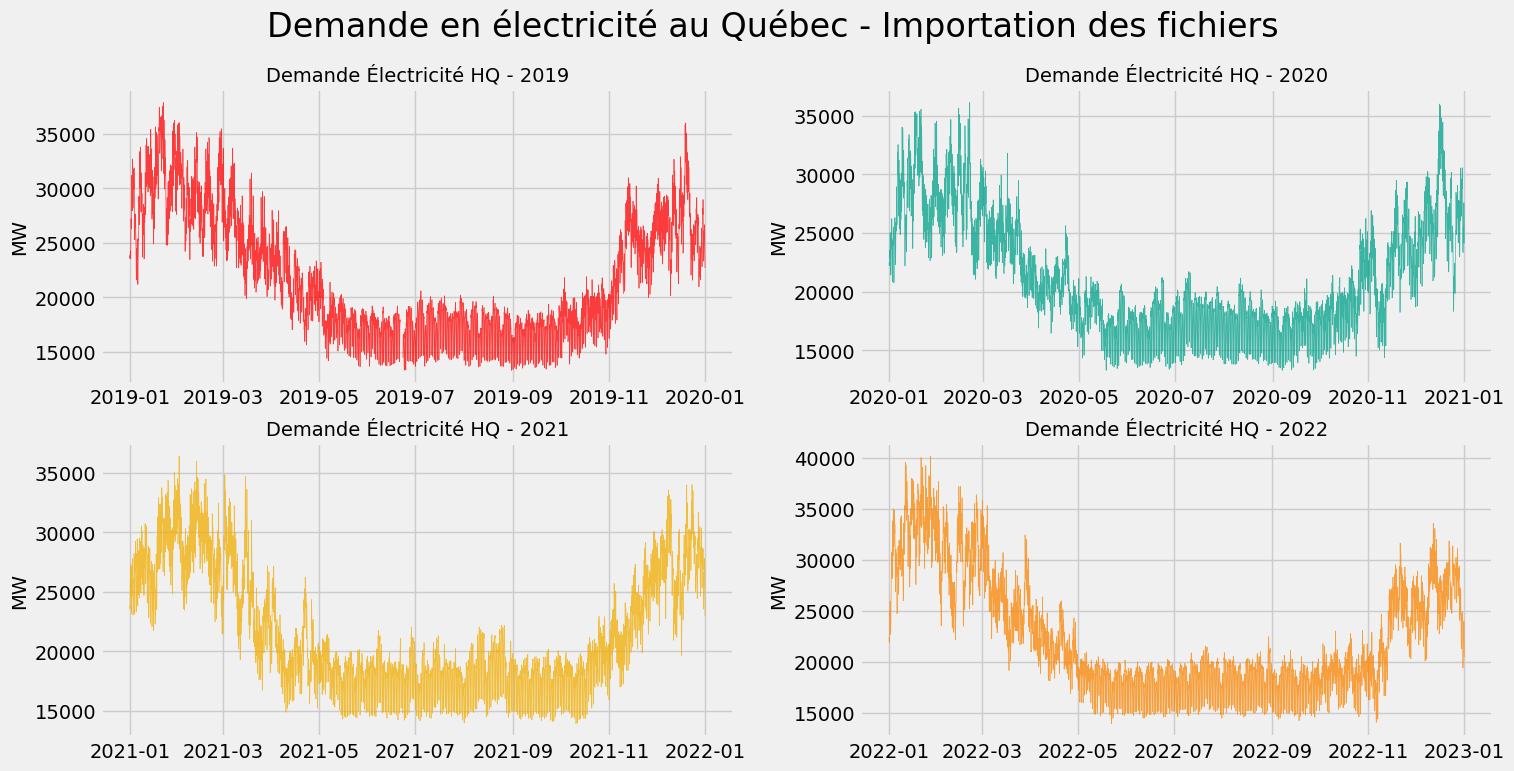

In [13]:
creation_grap_hist_HQ_import(dfs)

Nous pouvons voir sur le graphique qu'il n'y a plus de problème avec la dernière date de l'année 2021. 

## Concaténation des données en 1 seul dataframe

In [14]:
demande = pd.concat(dfs)

In [15]:
demande

,MW
2019-01-01 01:00:00,23762.55
2019-01-01 02:00:00,23830.23
2019-01-01 03:00:00,23608.07
2019-01-01 04:00:00,23562.48
2019-01-01 05:00:00,23546.16
...,...
2022-12-31 20:00:00,22627.35
2022-12-31 21:00:00,22004.14
2022-12-31 22:00:00,21469.17
2022-12-31 23:00:00,21021.14


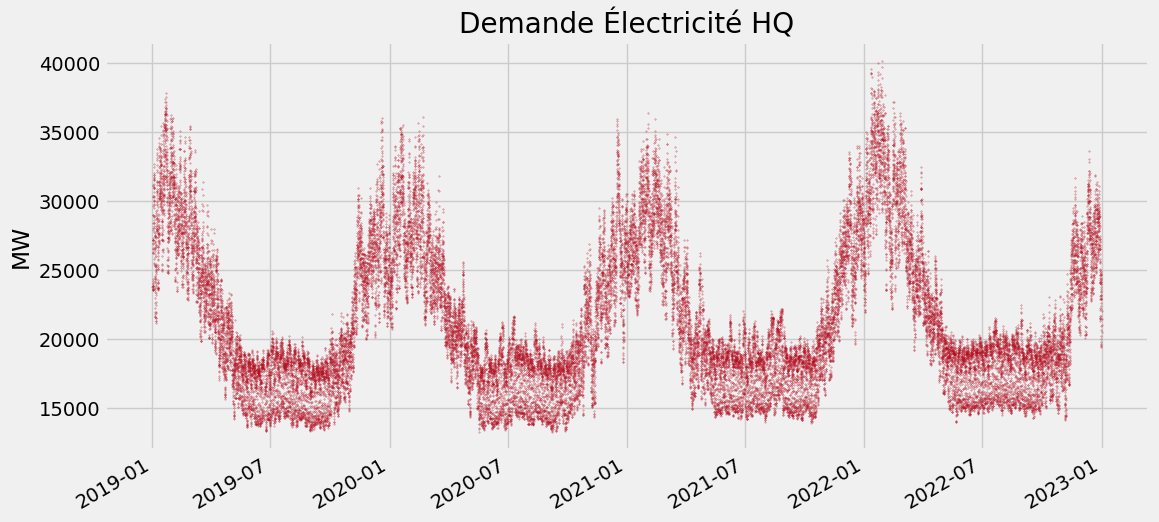

In [16]:
demande.plot(
    style=".",
    ms=0.6,
    color=colors_pal[5],
    alpha=0.7,
    figsize=(12, 6),
    title=f"Demande Électricité HQ",
    xlabel="",
    ylabel="MW",
    legend=False,
)
plt.show()

## Enregistrer les données historiques dans le fichier *interim* 

Nous pouvons conserver ces données dans un fichier parquet, en attendant de le joindre à d'autres données de température dans un 2e temps.

In [17]:
path_to_interim_data = "../data/interim/"
file = "historique_demande_HQ.parquet"

demande.to_parquet(
    path=os.path.join(path_to_interim_data, file),
    engine="pyarrow",
)

# Création du pipeline de données

Dans le but d'automatiser l'importation des données, nous allons transformer en fonctions les différentes étapes principales, que nous pourrons enchaîner et automatiser, de même que de réutiliser dans d'autres processus. 

- Importer tous les fichiers dans le dossier `data/raw/hq`
- Corriger les données
- Créer une visualisation des données importées, par année (donc par fichier)
- Concaténer tous les df
- Exporter vers un df en format parquet dans `data/interim` pour utilisation subséquente

In [18]:
def import_complet_donnees_historiques_HQ():
    data_path = "../data/raw/hq"
    img_path = "../reports/figures/"
    path_to_interim_data = "../data/interim/"

    file_parquet = "historique_demande_HQ.parquet"
    file_image = "historique_demande_HQ.png"

    dfs = list()

    for file in sorted(os.listdir(data_path)):
        df = (
            pd.read_excel(
                os.path.join(data_path, file)
            )
            .rename(columns={"Moyenne (MW)": "MW"})
            .set_index("Date")
        )

        dfs.append(df)

    correction_donnes_hist_HQ_import(dfs)

    creation_grap_hist_HQ_import(
        dfs,
        file_to_save=os.path.join(
            img_path, file_image
        ),
    )

    demande = pd.concat(dfs)

    demande.to_parquet(
        path=os.path.join(
            path_to_interim_data, file_parquet
        ),
        engine="pyarrow",
    )

    print(
        f"Import de {len(dfs)} fichier de données de demande d'életricité d'HQ terminé."
    )

Ceci permet de créer `src/data/historique_demande_hq.py` et de l'appeler à partir de `make data`. 

Nous obtenons donc le fichier parquet contenant toutes les données de demande électrique et le graphique présentant un aperçu des données importées. 

# Résumé 

Dans ce notebook, nous avons :

- importé les données des fichiers Excel de la demande historique d'HQ;   
- en effectuant une visualisation des données importées, constaté une erreur flagrante, probablement humaine, où la date au 1er janvier 2022 à minuit a été inscrite au 1er janvier 2023 ;    
- nettoyé les données en corrigeant cette erreur. Comme nous l'avons corrigé à même le traitement des données, nous sommes certains qu'elle sera toujours corrigée dans le futur, mais si nous téléchargeons à nouveau les données, ou si d'autres problèmes semblables surviennent dans le futur ;   
- concaténé toutes les données en un seul ensemble de données, dans notre cas, du 1er janvier 2019 au 31 décembre 2022 ;
- sauvegardé ces données intérimaires en un format parquet, que nous allons réutiliser subséquemment ;
- créer un pipeline de données dans le dossier `src/data`, afin d'automatiser toute cette partie